In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
test_df = pd.read_csv("C:\\Users\\seung\\OneDrive\\Desktop\\titanic_data\\test.csv")
train_df = pd.read_csv("C:\\Users\\seung\\OneDrive\\Desktop\\titanic_data\\train.csv")

In [40]:
train_df.set_index('PassengerId', inplace=True)
test_df.set_index('PassengerId', inplace=True)

In [41]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


In [42]:
train_index = train_df.index
test_index = test_df.index
#나중에 결과값을 따로 표출하기 위해 index를 저장 해 놓는다.

In [43]:
y_train_df = train_df.pop("Survived")
#생존유무 따로 뽑아서 넣어놓기.

In [44]:
y_train_df.head(3)

PassengerId
1    0
2    1
3    1
Name: Survived, dtype: int64

In [45]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#기본 설정

In [46]:
test_df.isnull().sum() / len(test_df)
#null값의 비율 찾아내기.

Pclass     0.00
Name       0.00
Sex        0.00
Age        0.21
SibSp      0.00
Parch      0.00
Ticket     0.00
Fare       0.00
Cabin      0.78
Embarked   0.00
dtype: float64

In [47]:
train_df.isnull().sum() / len(train_df) * 100

Pclass      0.00
Name        0.00
Sex         0.00
Age        19.87
SibSp       0.00
Parch       0.00
Ticket      0.00
Fare        0.00
Cabin      77.10
Embarked    0.22
dtype: float64

In [48]:
train_df["Cabin"]

PassengerId
1              NaN
2              C85
3              NaN
4             C123
5              NaN
6              NaN
7              E46
8              NaN
9              NaN
10             NaN
11              G6
12            C103
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             NaN
22             D56
23             NaN
24              A6
25             NaN
26             NaN
27             NaN
28     C23 C25 C27
29             NaN
30             NaN
          ...     
862            NaN
863            D17
864            NaN
865            NaN
866            NaN
867            NaN
868            A24
869            NaN
870            NaN
871            NaN
872            D35
873    B51 B53 B55
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            NaN
880            C50
881            NaN
882            NaN


In [49]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,7538,9.22,NaN,S
898,3,"Connolly, Miss. Kate",female,30.00,0,0,330972,7.63,NaN,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.00,1,1,248738,29.00,NaN,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00,0,0,2657,7.23,NaN,C


In [50]:
train_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
6,3,"Moran, Mr. James",male,nan,0,0,330877,8.46,NaN,Q
7,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.86,E46,S
8,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.07,NaN,S
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.13,NaN,S


In [51]:
all_df=train_df.append(test_df)
all_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
6,3,"Moran, Mr. James",male,nan,0,0,330877,8.46,NaN,Q
7,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.86,E46,S
8,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.07,NaN,S
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.13,NaN,S


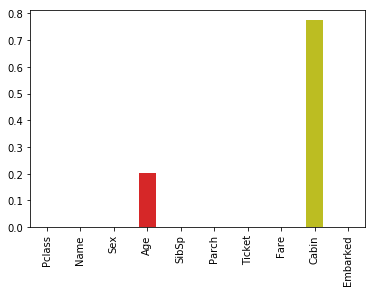

In [52]:
(all_df.isnull().sum() / len(all_df)).plot(kind='bar')
plt.show()

In [53]:
del all_df["Ticket"]

In [54]:
all_df

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,7.25,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,71.28,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,7.92,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,53.10,C123,S
5,3,"Allen, Mr. William Henry",male,35.00,0,0,8.05,NaN,S
6,3,"Moran, Mr. James",male,nan,0,0,8.46,NaN,Q
7,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,51.86,E46,S
8,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,21.07,NaN,S
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,11.13,NaN,S


In [55]:
all_df["Sex"] = all_df["Sex"].replace({"male":0,"female":1})

In [56]:
all_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22.00,1,0,7.25,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00,1,0,71.28,C85,C
3,3,"Heikkinen, Miss. Laina",1,26.00,0,0,7.92,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00,1,0,53.10,C123,S
5,3,"Allen, Mr. William Henry",0,35.00,0,0,8.05,NaN,S


In [57]:
all_df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [58]:
all_df["Embarked"] = all_df["Embarked"].replace({"S":0,"C":1,"Q":2, np.nan:99})

In [59]:
all_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",0,22.00,1,0,7.25,NaN,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00,1,0,71.28,C85,1
3,3,"Heikkinen, Miss. Laina",1,26.00,0,0,7.92,NaN,0
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00,1,0,53.10,C123,0
5,3,"Allen, Mr. William Henry",0,35.00,0,0,8.05,NaN,0


In [60]:
all_df.groupby("Pclass")["Age"].mean()

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

In [61]:
all_df.loc[ 
    (all_df["Pclass"] == 1) & (all_df["Age"].isnull()) , "Age"]

PassengerId
32     nan
56     nan
65     nan
167    nan
169    nan
186    nan
257    nan
271    nan
285    nan
296    nan
299    nan
307    nan
335    nan
352    nan
376    nan
458    nan
476    nan
508    nan
528    nan
558    nan
603    nan
634    nan
670    nan
712    nan
741    nan
767    nan
794    nan
816    nan
840    nan
850    nan
914    nan
933    nan
1038   nan
1040   nan
1060   nan
1083   nan
1097   nan
1158   nan
1182   nan
Name: Age, dtype: float64

In [62]:
all_df.loc[(all_df["Pclass"] == 1) & (
        all_df["Age"].isnull()), "Age"] = 39.16
all_df.loc[ (
    all_df["Pclass"] == 2) & all_df["Age"].isnull() , "Age"] = 29.51
all_df.loc[ ( all_df["Pclass"] == 3) & all_df["Age"].isnull(), "Age"] = 24.82

In [63]:
all_df.isnull().sum()

Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Cabin       1014
Embarked       0
dtype: int64

In [64]:
all_df.groupby("Pclass")["Fare"].mean()

Pclass
1   87.51
2   21.18
3   13.30
Name: Fare, dtype: float64

In [65]:
all_df.loc[all_df["Fare"].isnull(), "Fare"] = 13.30

In [68]:
all_df["Pclass"] = all_df["Pclass"].replace({1:"A",2:"B",3:"C"})

In [69]:
all_df

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,C,"Braund, Mr. Owen Harris",0,22.00,1,0,7.25,NaN,0
2,A,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.00,1,0,71.28,C85,1
3,C,"Heikkinen, Miss. Laina",1,26.00,0,0,7.92,NaN,0
4,A,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.00,1,0,53.10,C123,0
5,C,"Allen, Mr. William Henry",0,35.00,0,0,8.05,NaN,0
6,C,"Moran, Mr. James",0,24.82,0,0,8.46,NaN,2
7,A,"McCarthy, Mr. Timothy J",0,54.00,0,0,51.86,E46,0
8,C,"Palsson, Master. Gosta Leonard",0,2.00,3,1,21.07,NaN,0
9,C,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.00,0,2,11.13,NaN,0


In [74]:
del all_df["Name"]

In [75]:
all_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,C,0,22.00,1,0,7.25,NaN,0
2,A,1,38.00,1,0,71.28,C85,1
3,C,1,26.00,0,0,7.92,NaN,0
4,A,1,35.00,1,0,53.10,C123,0
5,C,0,35.00,0,0,8.05,NaN,0
6,C,0,24.82,0,0,8.46,NaN,2
7,A,0,54.00,0,0,51.86,E46,0
8,C,0,2.00,3,1,21.07,NaN,0
9,C,1,27.00,0,2,11.13,NaN,0


In [76]:
cabin_only = all_df[["Cabin"]].copy()

In [79]:
cabin_only["Cabin_Data"] = cabin_only["Cabin"].isnull().apply(lambda x: not x)

In [80]:
cabin_only

,Cabin,Cabin_Data
PassengerId,,
1,NaN,False
2,C85,True
3,NaN,False
4,C123,True
5,NaN,False
6,NaN,False
7,E46,True
8,NaN,False
9,NaN,False


In [81]:
cabin_only["Deck"] = cabin_only["Cabin"].str.slice(0,1)

In [83]:
cabin_only["Room"] = cabin_only["Cabin"].str.slice(1,5).str.extract("([0-9]+)",expand=False).astype("float")

In [84]:
cabin_only[cabin_only["Cabin_Data"]]

,Cabin,Cabin_Data,Deck,Room
PassengerId,,,,
2,C85,True,C,85.00
4,C123,True,C,123.00
7,E46,True,E,46.00
11,G6,True,G,6.00
12,C103,True,C,103.00
22,D56,True,D,56.00
24,A6,True,A,6.00
28,C23 C25 C27,True,C,23.00
32,B78,True,B,78.00


In [86]:
cabin_only.drop(["Cabin","Cabin_Data"],axis=1,inplace=True,errors="ignore")

In [89]:
cabin_only["Deck"]=cabin_only["Deck"].fillna("N")
cabin_only["Room"]=cabin_only["Room"].fillna(cabin_only["Room"].mean())

In [91]:
pd.get_dummies(cabin_only["Deck"], prefix="deck")

,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_N,deck_T
PassengerId,,,,,,,,,
1,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,1,0
7,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,1,0


In [99]:
matrix_df=pd.merge(all_df,pd.get_dummies(cabin_only["Deck"], prefix="deck"),left_index=True, right_index=True)

In [101]:
all_df=pd.merge(all_df, matrix_df[["deck_A","deck_B","deck_C","deck_D","deck_E","deck_F","deck_G","deck_N","deck_T"]],left_index=True, right_index=True)

In [103]:
del all_df["Cabin"]

In [122]:
all_df["Pclass"] = all_df["Pclass"].replace({1:"A",2:"B",3:"C"})

In [124]:
all_df = pd.get_dummies(all_df)
all_df.head()

,Sex,Age,SibSp,Parch,Fare,Embarked,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_N,deck_T,Pclass_A,Pclass_B,Pclass_C
PassengerId,,,,,,,,,,,,,,,,,,
1,0,22.00,1,0,7.25,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,38.00,1,0,71.28,1,0,0,1,0,0,0,0,0,0,1,0,0
3,1,26.00,0,0,7.92,0,0,0,0,0,0,0,0,1,0,0,0,1
4,1,35.00,1,0,53.10,0,0,0,1,0,0,0,0,0,0,1,0,0
5,0,35.00,0,0,8.05,0,0,0,0,0,0,0,0,1,0,0,0,1


In [125]:

train_df = all_df[all_df.index.isin(train_index)]
test_df = all_df[all_df.index.isin(test_index)]

In [126]:
train_df

,Sex,Age,SibSp,Parch,Fare,Embarked,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_N,deck_T,Pclass_A,Pclass_B,Pclass_C
PassengerId,,,,,,,,,,,,,,,,,,
1,0,22.00,1,0,7.25,0,0,0,0,0,0,0,0,1,0,0,0,1
2,1,38.00,1,0,71.28,1,0,0,1,0,0,0,0,0,0,1,0,0
3,1,26.00,0,0,7.92,0,0,0,0,0,0,0,0,1,0,0,0,1
4,1,35.00,1,0,53.10,0,0,0,1,0,0,0,0,0,0,1,0,0
5,0,35.00,0,0,8.05,0,0,0,0,0,0,0,0,1,0,0,0,1
6,0,24.82,0,0,8.46,2,0,0,0,0,0,0,0,1,0,0,0,1
7,0,54.00,0,0,51.86,0,0,0,0,0,1,0,0,0,0,1,0,0
8,0,2.00,3,1,21.07,0,0,0,0,0,0,0,0,1,0,0,0,1
9,1,27.00,0,2,11.13,0,0,0,0,0,0,0,0,1,0,0,0,1


In [127]:
#build Model

In [128]:
x_data = train_df.as_matrix()
y_data = y_train_df.as_matrix()

C:\Users\seung\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\seung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [129]:
x_data.shape, y_data.shape

((891, 18), (891,))

In [130]:
y_data

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [131]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
cls.fit(x_data,y_data)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [132]:
cls.intercept_

array([0.29821986])

In [133]:
cls.coef_

array([[ 2.59336605, -0.04165474, -0.32383133, -0.09153285,  0.00332615,
         0.25802297,  0.17196603,  0.11097799, -0.29114438,  0.53736107,
         0.88641291,  0.34505904, -0.57217193, -0.61601214, -0.27422874,
         0.79181061,  0.3479137 , -0.84150446]])

In [134]:
cls.predict(test_df.values)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [135]:
test_df.index

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [136]:

x_test = test_df.as_matrix()
y_test =cls.predict(x_test)
y_test

C:\Users\seung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [137]:

result = np.concatenate( (test_index.values.reshape(-1,1),
                 cls.predict(x_test).reshape(-1,1)  ) , axis=1)
result[:5]

array([[892,   0],
       [893,   0],
       [894,   0],
       [895,   0],
       [896,   1]], dtype=int64)

In [138]:
df_submssion =pd.DataFrame(result, columns=["PassengerId","Survived"])
df_submssion

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [139]:
df_submssion.to_csv("new_submission_result.csv",index=False)